In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.6 MB/s eta 0:00:00
   ━━━

In [1]:
from pycaret.classification import *

loaded_model = load_model('attack_model')

Transformation Pipeline and Model Successfully Loaded


In [2]:
import numpy as np
import pandas as pd
X_attack = np.load('attack_data.npy')
Y_attack = np.load('membership_labels.npy')
Y_attack = Y_attack.reshape(-1)

In [3]:
df_attack = pd.DataFrame(X_attack, columns=[f'feature_{i}' for i in range(X_attack.shape[1])])
df_attack['target'] = Y_attack

In [5]:
predictions = predict_model(loaded_model , data=df_attack)
y_pred = loaded_model.predict(df_attack.drop(columns=['target']))

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(df_attack['target'], y_pred)
recall = recall_score(df_attack['target'], y_pred)
f1 = f1_score(df_attack['target'], y_pred)
accuracy = accuracy_score(df_attack['target'], y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 0.876290832455216
Recall: 0.99792
F1 Score: 0.9331587806246493
Accuracy: 0.8808666666666667


In [7]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df_attack['target'], y_pred))

[[ 2956  7044]
 [  104 49896]]


AUC Score:  0.6484436450000001


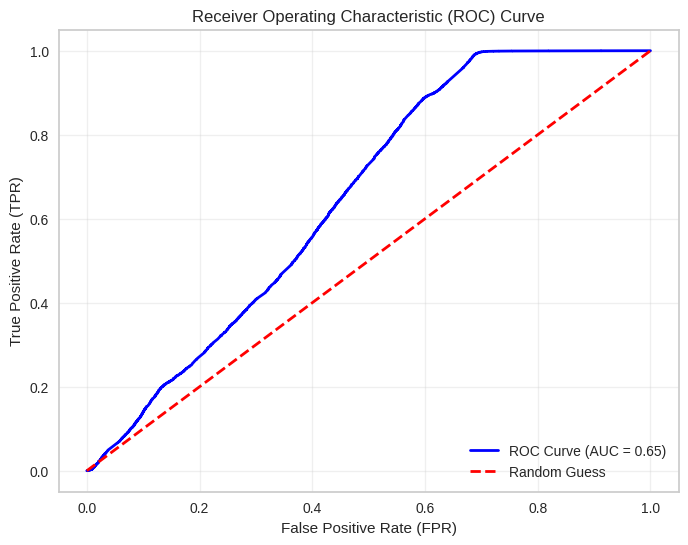

In [8]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
y_test = df_attack['target']
y_probs = loaded_model.predict_proba(df_attack.drop(columns=['target']))[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print("AUC Score: ",roc_auc)

# Step 5: Plot the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()